# Q5 + Q9 Notebook

In [2]:
from dual_autodiff.dual import Dual as pydual 
from dual_autodiff_x.dual import Dual as cydual 


In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
from dual_autodiff.q.q5 import * 
import timeit
from timeit import Timer
from memory_profiler import memory_usage

Given the function: 

f(x) = log(sin(x)) + x^2cos(x)

We are computing the derivative using three different methods:

1. Dual Numbers: Employing dual numbers to calculate the derivative.

2. Analytical Derivative: Deriving the derivative directly using calculus.

3. Numerical Derivative: Estimating the derivative using a numerical approximation method. 

In [4]:
x = 1.5

dual_value = dual_function_derivative(x)
analytical_value = analytical_derivative(x)

#varying numerical values:
numerical_value = numerical_derivative(x, 0.01)
numerical_value2 = numerical_derivative(x, 0.001)
numerical_value3 = numerical_derivative(x, 0.0001)

print(f"Dual Number Value: {dual_value}")
print(f"Analytical Derivative: {analytical_value}")
print(f"Numerical Derivative (s = 0.01): {numerical_value}")
print(f"Numerical Derivative (s = 0.001): {numerical_value2}")
print(f"Numerical Derivative (s = 0.0001): {numerical_value3}")

print("dual real", dual_value.dual)

Dual Number Value: Dual(real = 0.15665054756073515, dual = -1.9612372705533612)
Analytical Derivative: -1.9612372705533612
Numerical Derivative (s = 0.01): -1.9613078471950178
Numerical Derivative (s = 0.001): -1.9612379763359749
Numerical Derivative (s = 0.0001): -1.9612372776108
dual real -1.9612372705533612


Based on these derivative results, we observe that the derivative calculated using dual numbers closely aligns with both the analytical and numerical derivatives. To gain deeper insights, we can visualized the comparison:

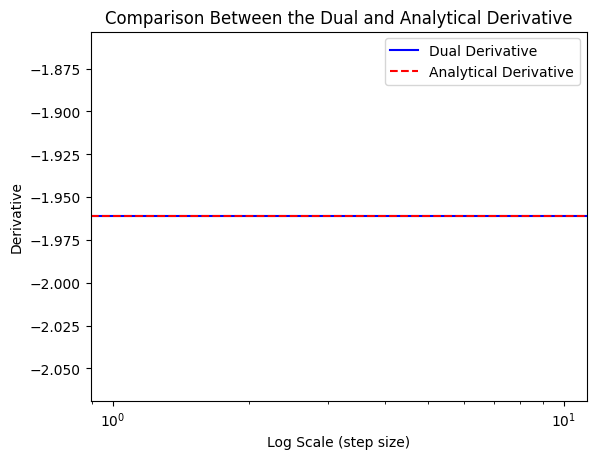

In [9]:
dual_d = dual_value.dual
plt.axhline(y = dual_d, color = 'b', linestyle = '-', label = "Dual Derivative")
plt.axhline(y = analytical_value, color = 'r', linestyle = '--', label = "Analytical Derivative")
plt.title("Comparison Between the Dual and Analytical Derivative")
plt.xscale('log')
plt.xlabel('Log Scale (step size)')
plt.ylabel('Derivative')
plt.legend()
plt.show()

In this graph we can see that the analytical derivative and derivative calculated using dual numers share the same outcome. This outcome indicates the validity of the dual number approach for derivative computation. Since the analytical derivative is derived using exact math principles, its agreement with the dual number result confirms that dual numbers provide accurate and reliable derivative calculations.

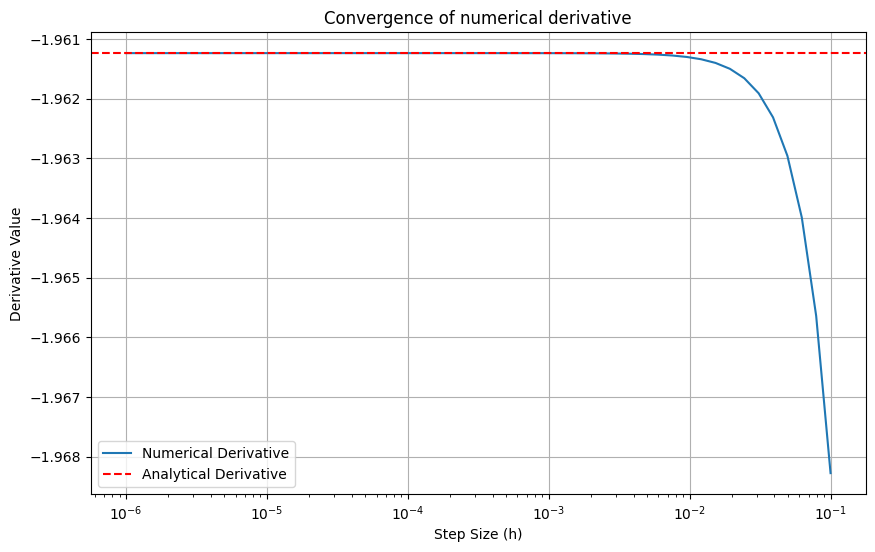

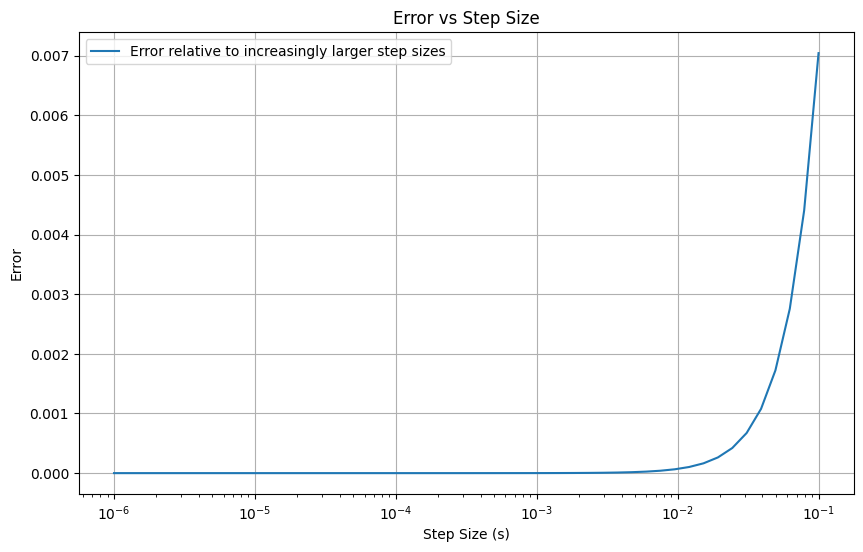

In [63]:
s_values = np.logspace(-6, -1, 50)
numerical_values = [numerical_derivative(x, s) for s in s_values]
errors = [abs(num - analytical_value) for num in numerical_values]

plt.figure(figsize=(10, 6))
plt.plot(s_values, numerical_values, label='Numerical Derivative')
plt.axhline(y = analytical_value, color = 'r', linestyle = '--', label = 'Analytical Derivative')
plt.xscale('log')
plt.xlabel('Step Size (h)')
plt.ylabel('Derivative Value')
plt.title("Convergence of numerical derivative")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(s_values, errors, label = 'Error relative to increasingly larger step sizes')
plt.xscale('log')
plt.xlabel('Step Size (s)')
plt.ylabel('Error')
plt.title("Error vs Step Size")
plt.legend()
plt.grid(True)
plt.show()

These graphs demonstrate that as the numerical step size increases, the error rate grows, following an exponential trend. This indicates that smaller step sizes yield results that align much closer to the analytical derivative, whereas larger step sizes introduce greater discrepancies. 

In this upcoming code we will compare the performance of the python dual_autodiff package and the cythonized dual_autodiff package, dual_autodiff_x: 

In [7]:
def py_add(a, b):
    return a + b

def py_sub(a, b):
    return a - b

def py_mult(a, b):
    return a * b

def py_div(a, b):
    return a / b

def cy_add(a, b):
    return a + b

def cy_sub(a, b):
    return a - b

def cy_mult(a, b):
    return a * b

def cy_div(a, b):
    return a / b

py_a, py_b = pydual(2, 3), pydual(3, 4)
cy_a, cy_b = cydual(2, 3), cydual(3, 4)

operations = ["add", "sub", "mult", "div"]
py_functions = [py_add, py_sub, py_mult, py_div]
cy_functions = [cy_add, cy_sub, cy_mult, cy_div]

py_time = []
cy_time = []

for func in py_functions:
    timer = timeit.Timer(lambda: func(py_a, py_b))
    py_time.append(timer.timeit(number=1000))


for func in cy_functions:
    timer = timeit.Timer(lambda: func(cy_a, cy_b))
    cy_time.append(timer.timeit(number=1000))

for operation, py_t, cy_t in zip(operations, py_time, cy_time):
    difference = py_t - cy_t 
    print(f"Time difference for {operation}: {difference} seconds")


Time difference for add: -8.000002708286047e-05 seconds
Time difference for sub: -7.583398837596178e-05 seconds
Time difference for mult: -9.620800847187638e-05 seconds
Time difference for div: -6.687501445412636e-05 seconds


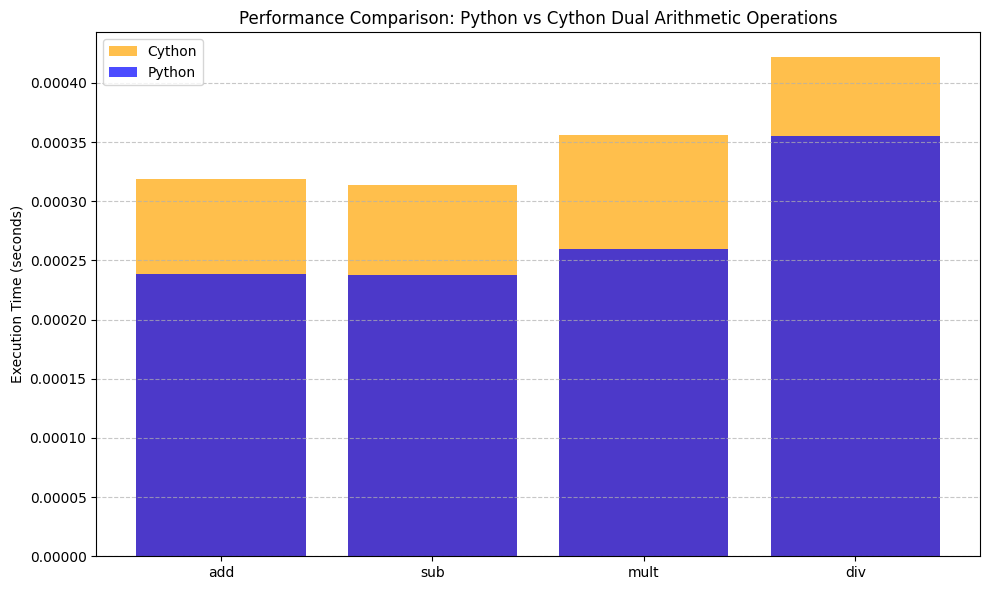

In [8]:
operations = ["add", "sub", "mult", "div"]
plt.figure(figsize=(10, 6))
plt.bar(operations, cy_time, label="Cython", color="orange", alpha = 0.7) 
plt.bar(operations, py_time, label="Python", color="blue", alpha = 0.7)
plt.ylabel("Execution Time (seconds)")
plt.title("Performance Comparison: Python vs Cython Dual Arithmetic Operations")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Cython is slower in this case because the Dual class and its operations still rely on python's dynamic type system and special methods (__add__, __mul__, __sub__, __div__). While cython compiles the code into C, it still interacts with python objects at runtime. This interaction includes dynamic type checking, memory management, and special method calls, which all introduce python level overhead that cython cannot bypass without explicit typecasting or translation to pure C-based code. Additionally, each operation with the dual class involves the creation of new dual objects, which creates python level object initialization overhead which further limits cython's performance advantages. 

Cython does well with tasks that are computation heavy; such as numerical array manipulations or matrix operations, where python's runtime overhead is minimized and C code optimization can be fully utilized. However, in this case, implementation involves frequent python object interactions and method dispatching which limits cython's potential performance improvements. This outcome showcases the importance of explicit static typing and restructuring object oriented code for cython to get the best performance possible. 

Here is a nested loop example: 

In [67]:
def poly_eval_py():
    x = pydual(2, 1)
    result = pydual(0, 0)
    for i in range(1, 1000):
        result += x**i
    return result

def poly_eval_cy():
    x = cydual(2, 1)
    result = cydual(0, 0)
    for i in range(1, 1000):
        result += x**i
    return result

py_timer = Timer(poly_eval_py)
cy_timer = Timer(poly_eval_cy)
py_time = py_timer.timeit(number=10)
cy_time = cy_timer.timeit(number=10)

print(cy_time - py_time)


0.0008500409894622862


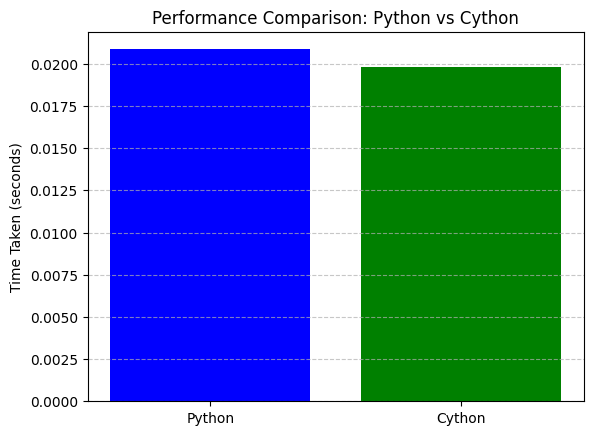

In [63]:
labels = ["Python", "Cython"]
times = [py_time, cy_time]
plt.bar(labels, times, color=['blue', 'green'])
plt.ylabel('Time Taken (seconds)')
plt.title('Performance Comparison: Python vs Cython')
plt.grid(axis = 'y', linestyle = '--' , alpha = 0.7)

Although the .pyx file was not typecast, this visual demonstrates that Cython is still more optimized than python when executing nested loops. This is primarily because Python loops incur runtime overhead due to dynamic type checking, which involves verifying the type of each variable at runtime during each iteration. In contrast, Cython compiles the code into C, eliminating the need for runtime type checking by using static typing which streamlines loop execution. 

Additionally, python's range function introduces more overhead by creating iterator that keeps track of its progress during each loop iteration. However, cython translates loops directly into C-style for loops which execute faster because they don't have extra overhead. These optimizations make cython a more efficient choice for computationally expensive tasks involving nested loops. 